In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re

plt.rc('font',family='Malgun Gothic')

In [2]:
weather = pd.read_csv('weather_data/기상.csv',encoding='cp949')
weather

,지점,지점명,일시,평균기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm),평균지면온도(°C)
0,184,제주,2015-01,7.4,1022.0,66,82.4,3.9,94.2,1.8,6.2
1,184,제주,2015-02,7.3,1020.2,64,35.5,3.7,93.5,0.5,7.5
2,184,제주,2015-03,10.4,1019.4,64,80.7,2.9,183.8,0.0,12.4
3,184,제주,2015-04,15.1,1013.5,71,147.9,2.9,163.4,NaN,17.1
4,184,제주,2015-05,18.8,1008.4,68,150.0,2.6,239.7,NaN,23.4
...,...,...,...,...,...,...,...,...,...,...,...
427,189,서귀포,2023-08,28.0,999.5,78,218.9,1.9,250.9,NaN,32.3
428,189,서귀포,2023-09,25.8,1006.4,75,126.4,1.7,217.7,NaN,28.5
429,189,서귀포,2023-10,19.9,1012.5,59,5.9,1.7,252.3,NaN,21.9
430,189,서귀포,2023-11,14.5,1015.5,66,45.2,1.6,198.4,NaN,14.2


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  432 non-null    int64  
 1   지점명                 432 non-null    object 
 2   일시                  432 non-null    object 
 3   평균기온(°C)            432 non-null    float64
 4   평균현지기압(hPa)         432 non-null    float64
 5   평균상대습도(%)           432 non-null    int64  
 6   월합강수량(00~24h만)(mm)  432 non-null    float64
 7   평균풍속(m/s)           431 non-null    float64
 8   합계 일조시간(hr)         432 non-null    float64
 9   최심적설(cm)            29 non-null     float64
 10  평균지면온도(°C)          431 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 37.2+ KB


In [4]:
weather["일시"] = pd.to_datetime(weather["일시"])
weather['연도']=weather['일시'].dt.year
weather['월']=weather['일시'].dt.month

In [24]:
weather['최심적설(cm)']=weather['최심적설(cm)'].fillna(0)

In [9]:
weather.describe()

,지점,일시,평균기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm),평균지면온도(°C),연도,월
count,432.000000,432,432.000000,432.000000,432.000000,432.000000,431.000000,432.000000,432.000000,431.000000,432.000000,432.000000
mean,186.500000,2019-06-16 19:06:40,16.601389,1011.495370,74.245370,145.845602,3.560789,174.603935,0.258796,18.219954,2019.000000,6.500000
min,184.000000,2015-01-01 00:00:00,4.000000,996.800000,55.000000,2.800000,1.400000,31.400000,0.000000,3.300000,2015.000000,1.000000
25%,184.750000,2017-03-24 06:00:00,9.875000,1005.750000,67.000000,54.375000,2.300000,142.725000,0.000000,11.050000,2017.000000,3.750000
50%,186.500000,2019-06-16 00:00:00,16.500000,1011.500000,72.500000,104.250000,3.000000,176.600000,0.000000,18.600000,2019.000000,6.500000
75%,188.250000,2021-09-08 12:00:00,22.525000,1016.950000,81.000000,205.200000,4.000000,208.725000,0.000000,25.200000,2021.000000,9.250000
max,189.000000,2023-12-01 00:00:00,29.400000,1024.100000,97.000000,692.400000,10.000000,297.600000,14.400000,33.800000,2023.000000,12.000000
std,2.063943,NaN,7.081530,6.959977,9.273117,122.805590,1.917743,49.458923,1.399359,8.373925,2.584983,3.456055


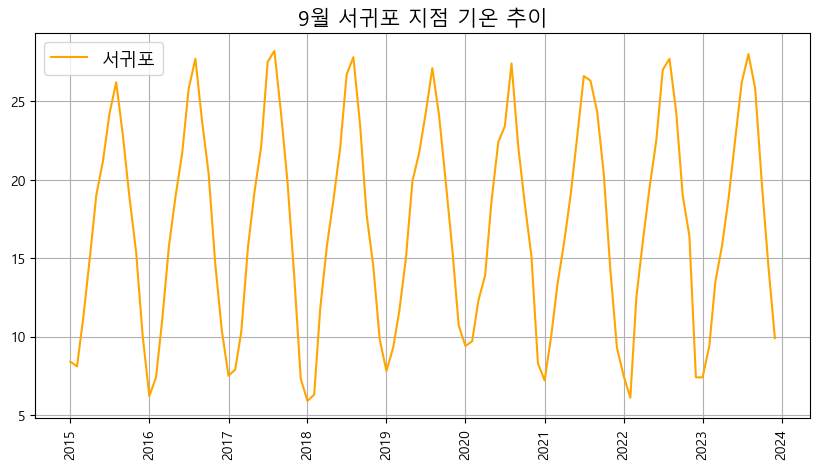

In [16]:
spot_ = '서귀포'
d_ = weather[(weather["지점명"]==spot_)]
plt.figure(figsize=(10,5))
plt.title("9월 %s 지점 기온 추이" % spot_, fontsize=15)
plt.plot(d_["일시"], d_["평균기온(°C)"], "-", color='orange', label=str(spot_))
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

In [17]:
weather.지점명.unique()

array(['제주', '고산', '성산', '서귀포'], dtype=object)

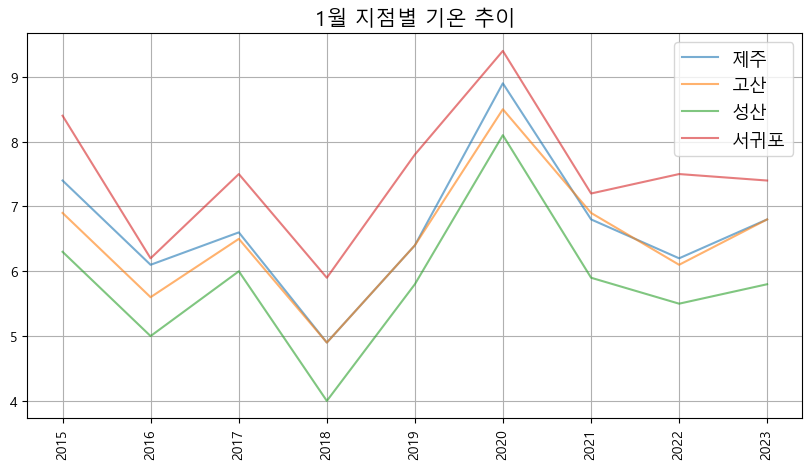

In [18]:
plt.figure(figsize=(10,5))
plt.title("1월 지점별 기온 추이", fontsize=15)
for spot_ in ['제주', '고산', '성산', '서귀포']:
    d_ = weather[(weather["지점명"]==spot_) & (weather["월"]==1)]
    plt.plot(d_["일시"], d_["평균기온(°C)"], "-", label=str(spot_), alpha=.6)
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

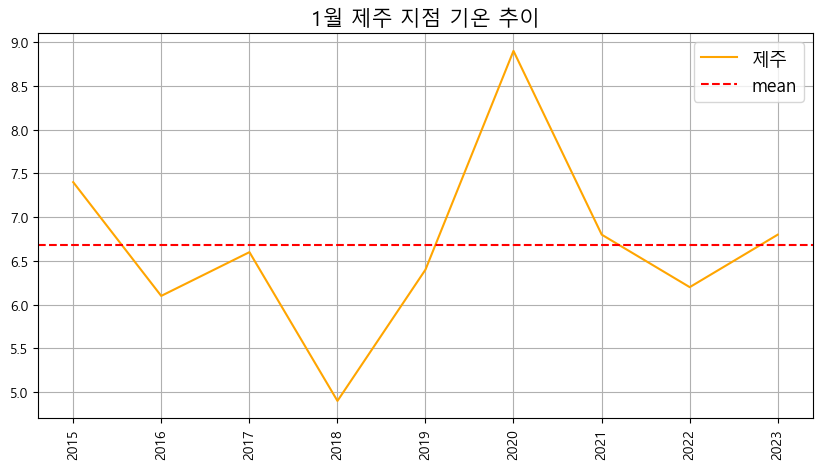

In [21]:
spot_ = '제주'
d_ = weather[(weather["지점명"]==spot_) & (weather["월"]==1)]
plt.figure(figsize=(10,5))
plt.title("1월 %s 지점 기온 추이" % spot_, fontsize=15)
plt.plot(d_["일시"], d_["평균기온(°C)"], "-", color='orange', label=str(spot_))
plt.axhline(y= d_["평균기온(°C)"].mean(), linestyle='--', color='red', label="mean")
#plt.axvline(x= pd.to_datetime("2019-01-01"), color='blue', label="spot")
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

In [24]:
weather.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '평균현지기압(hPa)', '평균상대습도(%)',
       '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '합계 일조시간(hr)', '최심적설(cm)',
       '평균지면온도(°C)', '연도', '월'],
      dtype='object')

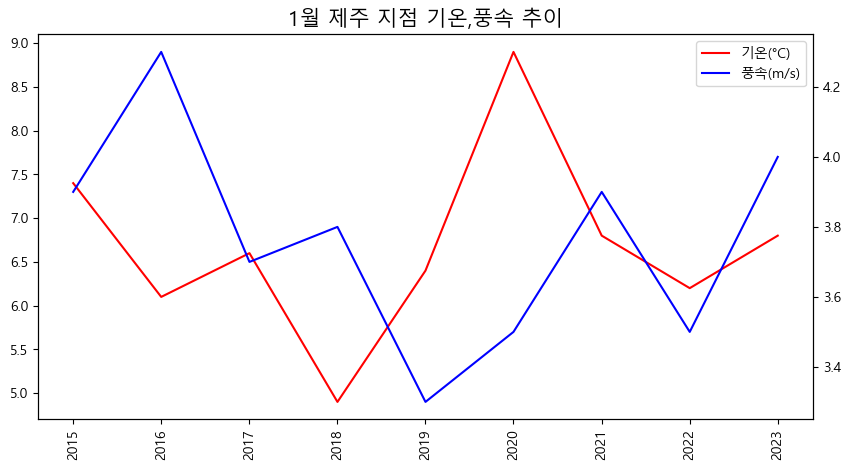

In [25]:
spot_ = '제주'
d_ = weather[(weather["지점명"]==spot_) & (weather["월"]==1)]
plt.figure(figsize=(10,5))
plt.title("1월 %s 지점 기온,풍속 추이" % spot_, fontsize=15)
plt.xticks(rotation=90)
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(d_["일시"], d_["평균기온(°C)"], "-", color='red', label="기온(°C)")
b, = ax2.plot(d_["일시"], d_["평균풍속(m/s)"], "-", color='blue', label="풍속(m/s)")
p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p])
plt.show()

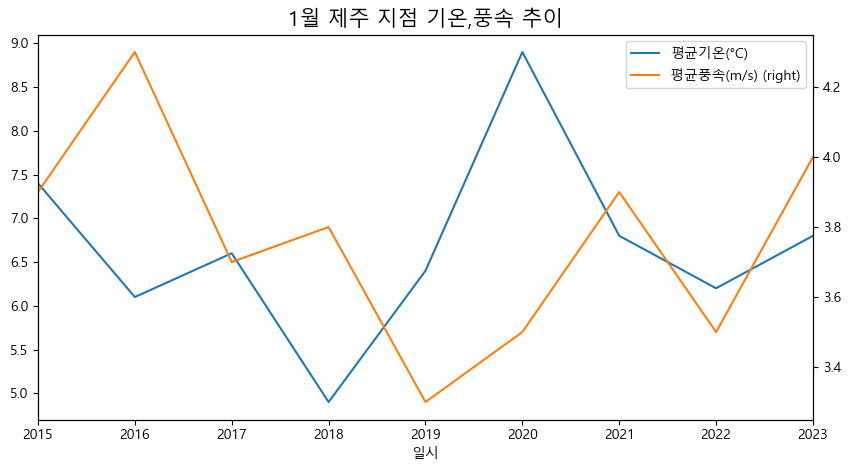

In [26]:
ax = d_.plot('일시','평균기온(°C)', figsize=(10,5))
plt.title("1월 %s 지점 기온,풍속 추이" % spot_, fontsize=15)
d_.plot('일시','평균풍속(m/s)',secondary_y=True, ax=ax)
plt.show()

In [29]:
weather['지점명'].unique()

array(['제주', '고산', '성산', '서귀포'], dtype=object)

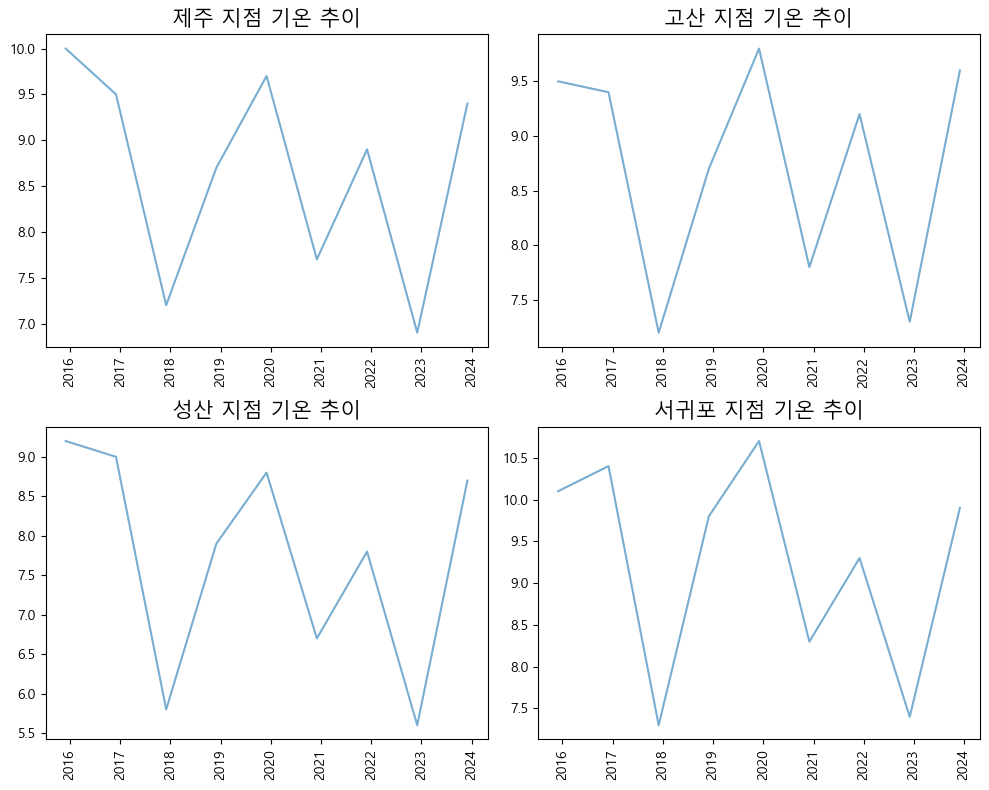

In [15]:
plt.figure(figsize=(10,8)) # 먼저 창을 만들고
n=1
for spot_ in ['제주', '고산', '성산', '서귀포']:
    d_ = weather[(weather["지점명"]==spot_) & (weather["월"]==12)]
    ax = plt.subplot(2,2,n) # for문을 돌면서 Axes를 추가
    plt.title("%s 지점 기온 추이" % spot_, fontsize=15)
    ax.plot(d_["일시"], d_["평균기온(°C)"], "-", label=str(spot_), alpha=.6) # 그래프 추가
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()

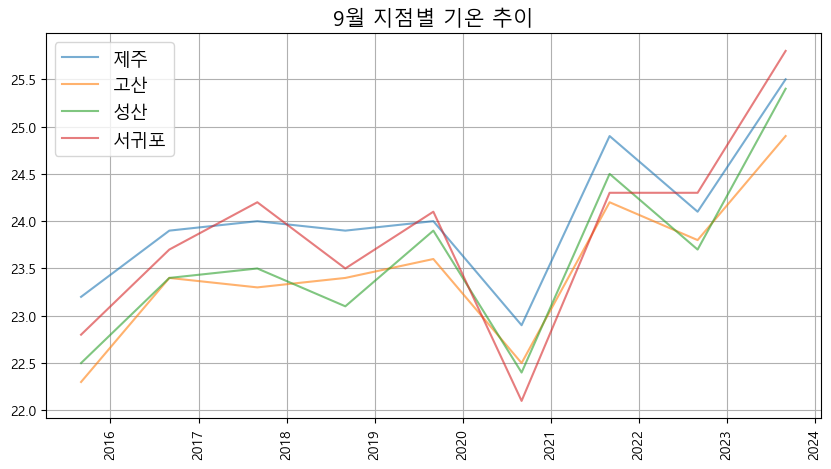

In [34]:
plt.figure(figsize=(10,5))
plt.title("9월 지점별 기온 추이", fontsize=15)
for spot_ in ['제주','고산','성산','서귀포']:
    d_ = weather[(weather["지점명"]==spot_) & (weather["월"]==9)]
    plt.plot(d_["일시"], d_["평균기온(°C)"], "-", label=str(spot_), alpha=.6)
plt.grid()
plt.legend(loc='upper left', fontsize=13)
plt.xticks(rotation=90)
plt.show()

In [36]:
weather.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '평균현지기압(hPa)', '평균상대습도(%)',
       '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '합계 일조시간(hr)', '최심적설(cm)',
       '평균지면온도(°C)', '연도', '월'],
      dtype='object')

In [37]:
heat_ = weather[['평균기온(°C)', '평균현지기압(hPa)', '평균상대습도(%)',
       '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '합계 일조시간(hr)', '최심적설(cm)',
       '평균지면온도(°C)',]].dropna().copy()

c:\Python39\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


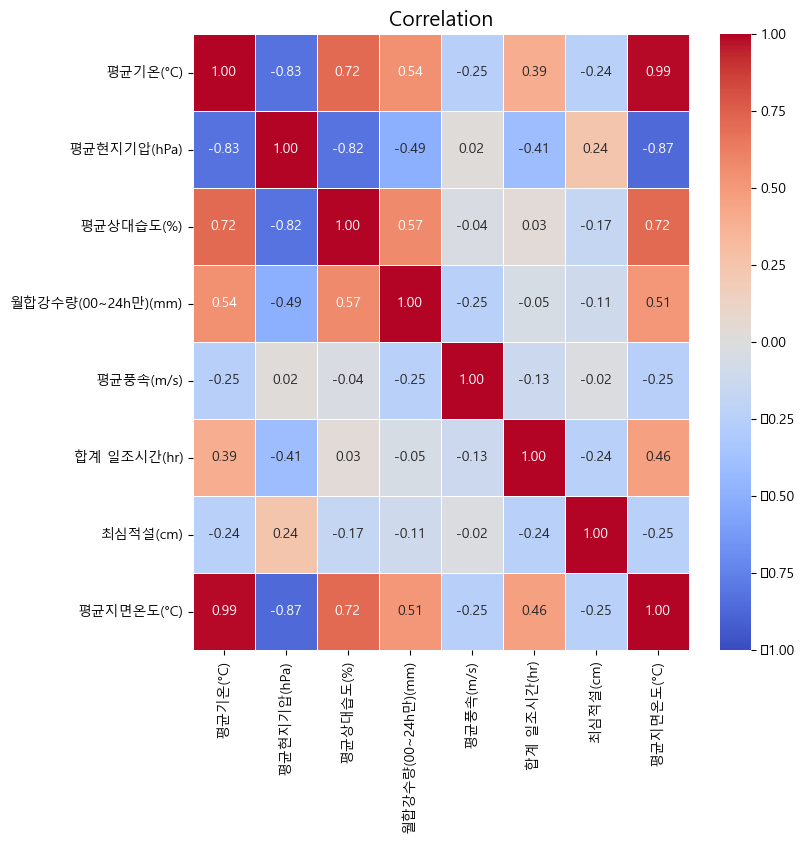

In [39]:
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title("Correlation", fontsize=15)
sns.heatmap(data = heat_.corr(),
            annot=True,
            fmt = '.2f', linewidths=.5, cmap='coolwarm',
           vmin = -1, vmax = 1, center = 0)
plt.show()

In [48]:
#!pip install folium
!pip install charset
#!pip install pyproject-toml

  Using cached charset-1.0.1.tar.gz (189 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)
  Running setup.py clean for charset
Failed to build charset


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.9
      creating build\lib.win-amd64-3.9\charset
      copying charset\cmd.py -> build\lib.win-amd64-3.9\charset
      copying charset\__init__.py -> build\lib.win-amd64-3.9\charset
      running egg_info
      writing charset.egg-info\PKG-INFO
      writing dependency_links to charset.egg-info\dependency_links.txt
      writing entry points to charset.egg-info\entry_points.txt
      writing requirements to charset.egg-info\requires.txt
      writing top-level names to charset.egg-info\top_level.txt
      reading manifest file 'charset.egg-info\SOURCES.txt'
      reading manifest template 'MANIFEST.in'
      writing manifest file 'charset.egg-info\SOURCES.txt'
      running build_ext
      building 'charset.detector' ext

In [1]:
import folium
import pandas as pd

In [3]:
df = pd.read_excel('C:\workspace\project\지점정보.xlsx')       

In [25]:
weather

,지점,지점명,일시,평균기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm),평균지면온도(°C),연도,월
0,184,제주,2015-01-01,7.4,1022.0,66,82.4,3.9,94.2,1.8,6.2,2015,1
1,184,제주,2015-02-01,7.3,1020.2,64,35.5,3.7,93.5,0.5,7.5,2015,2
2,184,제주,2015-03-01,10.4,1019.4,64,80.7,2.9,183.8,0.0,12.4,2015,3
3,184,제주,2015-04-01,15.1,1013.5,71,147.9,2.9,163.4,0.0,17.1,2015,4
4,184,제주,2015-05-01,18.8,1008.4,68,150.0,2.6,239.7,0.0,23.4,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,189,서귀포,2023-08-01,28.0,999.5,78,218.9,1.9,250.9,0.0,32.3,2023,8
428,189,서귀포,2023-09-01,25.8,1006.4,75,126.4,1.7,217.7,0.0,28.5,2023,9
429,189,서귀포,2023-10-01,19.9,1012.5,59,5.9,1.7,252.3,0.0,21.9,2023,10
430,189,서귀포,2023-11-01,14.5,1015.5,66,45.2,1.6,198.4,0.0,14.2,2023,11


In [30]:
df_w = pd.merge(weather,df,on='지점',how = 'outer')
df_w = df_w.drop('지점명_y',axis=1)
df_w = df_w.rename(columns={'지점명_x':'지점명'})

In [31]:
df_w

,지점,지점명,일시,평균기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm),평균지면온도(°C),연도,월,지점주소,위도,경도
0,184,제주,2015-01-01,7.4,1022.0,66,82.4,3.9,94.2,1.8,6.2,2015,1,제주특별자치도 제주시만덕로 6길 32 제주지방기상청,33.5141,126.5297
1,184,제주,2015-02-01,7.3,1020.2,64,35.5,3.7,93.5,0.5,7.5,2015,2,제주특별자치도 제주시만덕로 6길 32 제주지방기상청,33.5141,126.5297
2,184,제주,2015-03-01,10.4,1019.4,64,80.7,2.9,183.8,0.0,12.4,2015,3,제주특별자치도 제주시만덕로 6길 32 제주지방기상청,33.5141,126.5297
3,184,제주,2015-04-01,15.1,1013.5,71,147.9,2.9,163.4,0.0,17.1,2015,4,제주특별자치도 제주시만덕로 6길 32 제주지방기상청,33.5141,126.5297
4,184,제주,2015-05-01,18.8,1008.4,68,150.0,2.6,239.7,0.0,23.4,2015,5,제주특별자치도 제주시만덕로 6길 32 제주지방기상청,33.5141,126.5297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,189,서귀포,2023-08-01,28.0,999.5,78,218.9,1.9,250.9,0.0,32.3,2023,8,제주특별자치도 서귀포시태평로 439번길17 서귀포관측소,33.2462,126.5653
428,189,서귀포,2023-09-01,25.8,1006.4,75,126.4,1.7,217.7,0.0,28.5,2023,9,제주특별자치도 서귀포시태평로 439번길17 서귀포관측소,33.2462,126.5653
429,189,서귀포,2023-10-01,19.9,1012.5,59,5.9,1.7,252.3,0.0,21.9,2023,10,제주특별자치도 서귀포시태평로 439번길17 서귀포관측소,33.2462,126.5653
430,189,서귀포,2023-11-01,14.5,1015.5,66,45.2,1.6,198.4,0.0,14.2,2023,11,제주특별자치도 서귀포시태평로 439번길17 서귀포관측소,33.2462,126.5653


In [ ]:
df_w = 

In [ ]:
map=folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=10)
map

In [19]:
#제주시(blue)-서귀포시(green) 구분해서 folium.Marker
tiles = "http://mt0.google.com/vt/lyrs=m&hl=ko&x={x}&y={y}&z={z}" #구글지도 타일 설정
attr= "Google" #속성 설정
map = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], #folium을 사용하여 지도 초기화
                 tiles=tiles, attr=attr)
for i in df.index: #df의 각 행을 반복
    folium.Marker(
        location=[df.loc[i, '위도'], df.loc[i, '경도']],
        tooltip=df.loc[i, '지점명'], #마커에 마우스를 올렸을 때 표시되는 툴팁으로 약국명 표시
        popup=folium.Popup(df.loc[i, '지점주소'], max_width=200),
        icon=folium.Icon(color='darkred', icon='sun',prefix='fa')
    ).add_to(map)

In [20]:
map